In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf, pacf


In [2]:
df = pd.read_csv('./datasets/candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [3]:
df['observation_date']= pd.to_datetime(df['observation_date'], infer_datetime_format=True)
df_index = df.set_index(['observation_date'])
df_index=df_index['IPG3113N']

In [4]:
df_index.head()

observation_date
1972-01-01    85.6945
1972-02-01    71.8200
1972-03-01    66.0229
1972-04-01    64.5645
1972-05-01    65.0100
Name: IPG3113N, dtype: float64

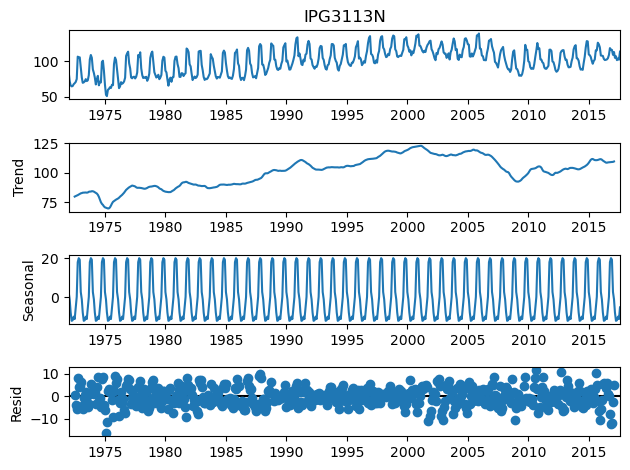

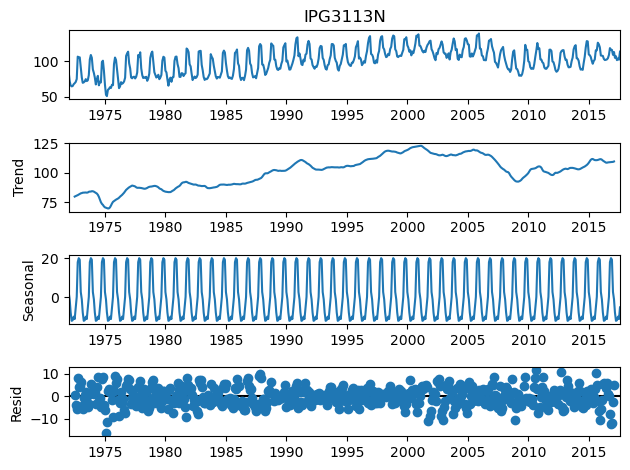

In [5]:
decompose_data = seasonal_decompose(df_index, model='additive')
decompose_data.plot()

In [6]:
def stationarity_test(timeseries_data):
    
    timeseries_data.dropna(inplace= True)
    
    rol_mean = timeseries_data.rolling(window= 12).mean()
    rol_std = timeseries_data.rolling(window = 12).std()

    orig = plt.plot(timeseries_data, label= 'Original')
    mean = plt.plot(rol_mean, label = 'Rolling Mean')
    std = plt.plot(rol_std, label = 'Rolling std')

    plt.legend(loc = 'best')
    plt.title('Time series data with mean and std dev')

    adfuller_test = adfuller(timeseries_data)
    adfuller_test_ouput = pd.Series(adfuller_test[0:4], index = ['Test Statistics', 'Mackinnon"s approximate p-vaue', '#usedLag', 'NOBS'])

    print(adfuller_test_ouput)
    

Test Statistics                    -1.887050
Mackinnon"s approximate p-vaue      0.338178
#usedLag                           14.000000
NOBS                              533.000000
dtype: float64


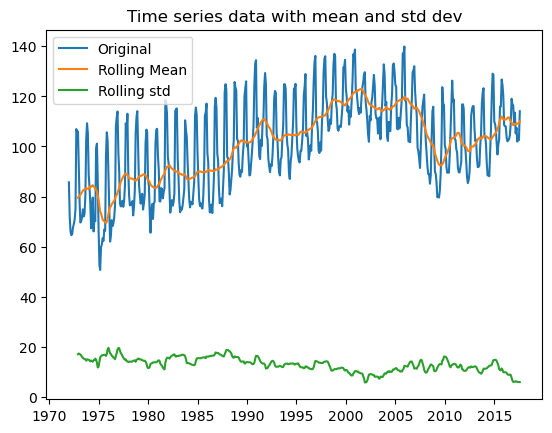

In [7]:
stationarity_test(df_index)

Test Statistics                    -1.841721
Mackinnon"s approximate p-vaue      0.359954
#usedLag                           15.000000
NOBS                              532.000000
dtype: float64


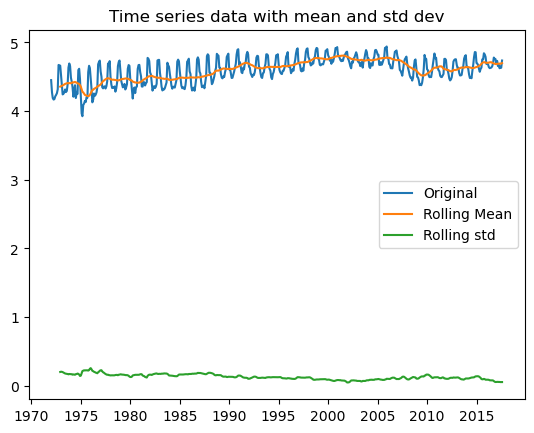

In [8]:
df_index_log_scaled = np.log(df_index)
stationarity_test(df_index_log_scaled)

Test Statistics                  -7.573451e+00
Mackinnon"s approximate p-vaue    2.801611e-11
#usedLag                          1.400000e+01
NOBS                              5.220000e+02
dtype: float64


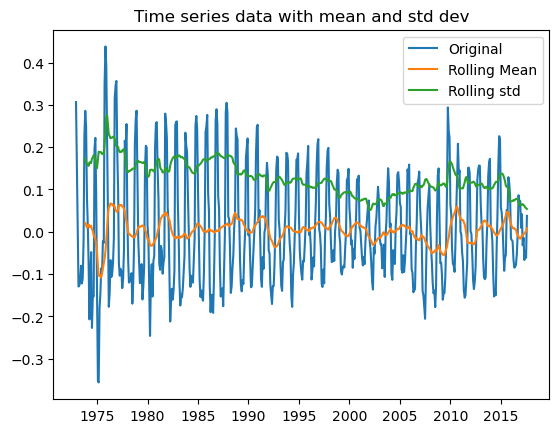

In [9]:
ma = df_index_log_scaled.rolling(window=12).mean()
df_index_log_scaled_minus_ma = df_index_log_scaled-ma

stationarity_test(df_index_log_scaled_minus_ma)

In [10]:
lag_acf = acf(df_index_log_scaled_minus_ma, nlags= 140)
lag_pacf = pacf(df_index_log_scaled_minus_ma, nlags= 70)

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


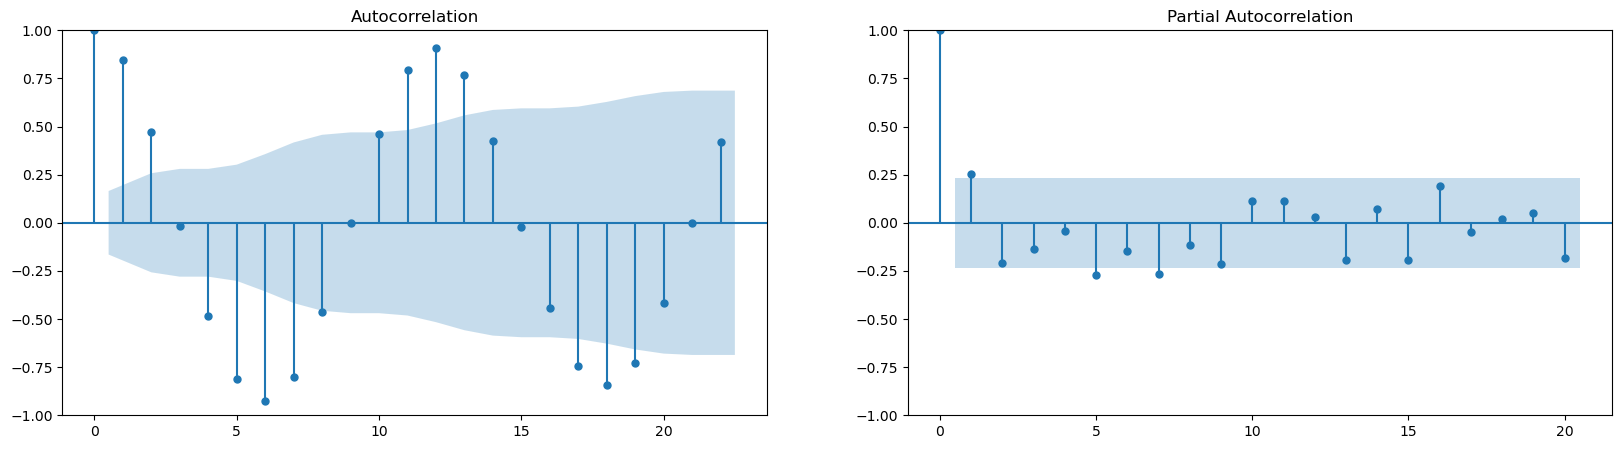

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2 , figsize= (20,5))
plot_acf(lag_acf, ax= ax[0])
plot_pacf(lag_pacf, lags= 20, ax= ax[1])

plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA, sarimax
from sklearn.model_selection import train_test_split

df_index_log_scaled_minus_ma.dropna(inplace=True)
train, test =train_test_split(df_index_log_scaled_minus_ma, test_size=0.10, shuffle=False)

model_arima = ARIMA(train, order= (1,1,2))

model_arima_fit = model_arima.fit()
predictions = model_arima_fit.predict(start='2013-03-01', end = '2017--08-01')


c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
predictions

2013-03-01   -0.019713
2013-04-01   -0.023905
2013-05-01   -0.023288
2013-06-01   -0.023379
2013-07-01   -0.023365
2013-08-01   -0.023367
2013-09-01   -0.023367
2013-10-01   -0.023367
2013-11-01   -0.023367
2013-12-01   -0.023367
2014-01-01   -0.023367
2014-02-01   -0.023367
2014-03-01   -0.023367
2014-04-01   -0.023367
2014-05-01   -0.023367
2014-06-01   -0.023367
2014-07-01   -0.023367
2014-08-01   -0.023367
2014-09-01   -0.023367
2014-10-01   -0.023367
2014-11-01   -0.023367
2014-12-01   -0.023367
2015-01-01   -0.023367
2015-02-01   -0.023367
2015-03-01   -0.023367
2015-04-01   -0.023367
2015-05-01   -0.023367
2015-06-01   -0.023367
2015-07-01   -0.023367
2015-08-01   -0.023367
2015-09-01   -0.023367
2015-10-01   -0.023367
2015-11-01   -0.023367
2015-12-01   -0.023367
2016-01-01   -0.023367
2016-02-01   -0.023367
2016-03-01   -0.023367
2016-04-01   -0.023367
2016-05-01   -0.023367
2016-06-01   -0.023367
2016-07-01   -0.023367
2016-08-01   -0.023367
2016-09-01   -0.023367
2016-10-01 

In [21]:
train

observation_date
1972-12-01    0.306498
1973-01-01    0.152235
1973-02-01   -0.020702
1973-03-01   -0.129495
1973-04-01   -0.126756
                ...   
2012-10-01    0.145831
2012-11-01    0.156496
2012-12-01    0.156168
2013-01-01    0.069161
2013-02-01    0.018404
Name: IPG3113N, Length: 483, dtype: float64

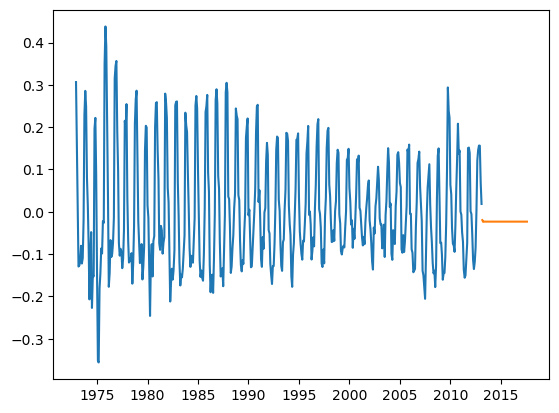

In [22]:
plt.plot(train)
plt.plot(predictions)

In [23]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: ', error)

Test MSE:  0.008873226053182437


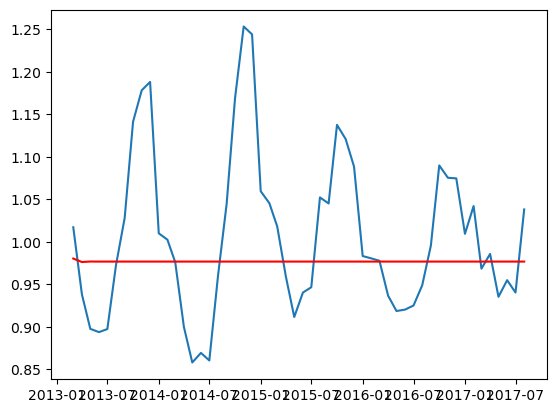

In [24]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color = 'red')
plt.show()

<Axes: ylabel='Density'>

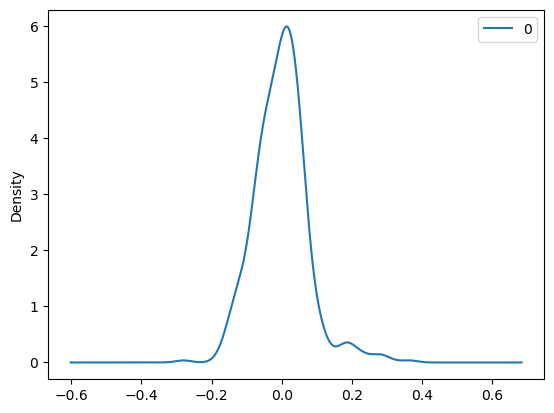

In [18]:
from pandas import DataFrame
residual = DataFrame(model_arima_fit.resid)
residual.plot(kind='kde')

In [28]:
import statsmodels.api as sm

model_sarimax = sm.tsa.statespace.SARIMAX(train, order= (2,1,2), seasonal_order= (2,1,2,12))
model_sarimax_fit = model_sarimax.fit()
prediction = model_sarimax_fit.predict(start = "2013-3-01", end= "2017-08-01")

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


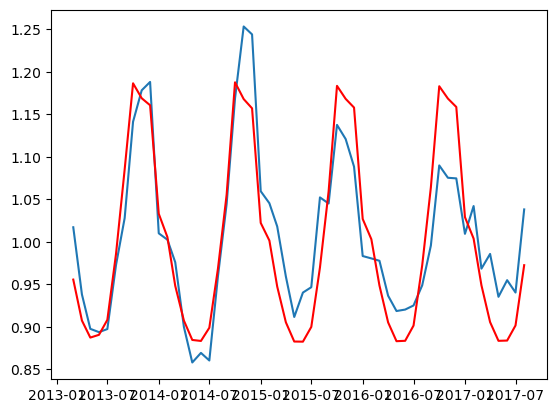

In [29]:
predict = np.exp(prediction)
test_set = np.exp(test)

plt.plot(test_set)
plt.plot(predict, color = 'red')
plt.show()

<Axes: ylabel='Density'>

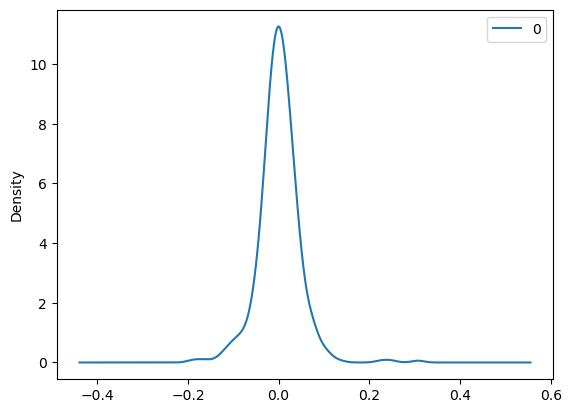

In [30]:
residual = DataFrame(model_sarimax_fit.resid)
residual.plot(kind='kde')